In [1]:
%autosave 0

Autosave disabled


In [2]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length','sepal width','petal length','petal width','label']
    data = np.array(df.iloc[:100,[0,1,-1]])
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
class LogisticRegressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat
    
    def fit(self, X, y):
        data_mat = self.data_matrix(X)
        self.weights = np.zeros((len(data_mat[0]),1), dtype=np.float32)
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={}, max_iter={})'.format(self.learning_rate, self.max_iter))
        
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [10]:
lr_clf = LogisticRegressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01, max_iter=200)


In [11]:
lr_clf.score(X_test, y_test)

1.0

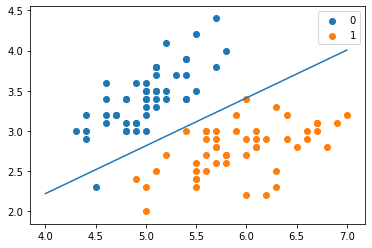

In [14]:
x_points = np.arange(4,8)
y_ = -(lr_clf.weights[1] * x_points + lr_clf.weights[0]) / lr_clf.weights[2]
plt.plot(x_points, y_)

plt.scatter(X[:50,0], X[:50,1], label='0')
plt.scatter(X[50:,0], X[50:,1], label='1')
plt.legend()

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(max_iter=200)

In [17]:
clf.fit(X_train, y_train)

D:\anaconda3-2019-10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
clf.score(X_test, y_test)

1.0

In [19]:
print(clf.coef_, clf.intercept_)

[[ 1.9425219  -3.24705974]] [-0.48006433]


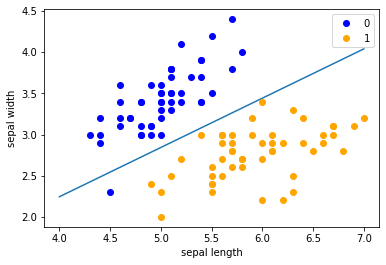

In [20]:
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_)

plt.plot(X[:50,0], X[:50,1], 'bo', color='blue', label='0')
plt.plot(X[50:,0], X[50:,1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()